### Prof. Alfio Ferrara
# Rappresentazione vettoriale del testo
### Master in Digital Humanities

I calcolatori elettronici necessitano di convertire il linguaggio naturale in rappresentazioni numeriche o simboliche che possano essere processate algoritmicamente.

Un modo per trasformare il testo in una sua rappresentazione numerica consiste nell'associare un'entità matematica (per esempio un numero) alle componenti costitutive del testo. Chiamiamo queste componenti unitarie **token** e il processo di scomposizione del testo in token *tokenizzazione*.

La tokenizzazione è il processo fondamentale di suddivisione del testo in unità più piccole e gestibili chiamate **token**. Un token può essere una parola, una sottoparola, un carattere, o anche una frase, a seconda del metodo utilizzato e dell'applicazione specifica.

## Tokenizzazione e spazio vettoriale

Prendiamo ad esempio un corpus di pseudo-testi che contengono la condizione metereologica osservata giorno dopo giorno in periodi temporali di diversa durata

In [1]:
corpus = [
    "sole pioggia sole",                          # Testo 1 (3 giorni)
    "sole sole sole pioggia pioggia",             # Testo 2 (5 giorni)
    "pioggia pioggia pioggia sole",               # Testo 3 (4 giorni)
    "sole sole sole sole pioggia pioggia",        # Testo 4 (6 giorni)
    "pioggia pioggia",                            # Testo 5 (2 giorni)
    "sole sole sole sole sole pioggia pioggia",   # Testo 6 (7 giorni)
    "sole pioggia pioggia pioggia",               # Testo 7 (4 giorni)
    "sole sole pioggia",                          # Testo 8 (3 giorni)
    "pioggia sole sole sole pioggia",             # Testo 9 (5 giorni)
    "sole sole sole pioggia pioggia pioggia"      # Testo 10 (6 giorni)
]

In [2]:
from collections import defaultdict
import pandas as pd
import numpy as np

In [3]:
collection = []
for doc in corpus:
    bow = defaultdict(lambda: 0)
    for c in doc:
        bow[c] += 1
    collection.append(bow)
X = pd.DataFrame(collection).fillna(0).astype(float)
X 

,s,o,l,e,,p,i,g,a
0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,3.0,5.0,3.0,3.0,4.0,2.0,4.0,4.0,2.0
2,1.0,4.0,1.0,1.0,3.0,3.0,6.0,6.0,3.0
3,4.0,6.0,4.0,4.0,5.0,2.0,4.0,4.0,2.0
4,0.0,2.0,0.0,0.0,1.0,2.0,4.0,4.0,2.0
5,5.0,7.0,5.0,5.0,6.0,2.0,4.0,4.0,2.0
6,1.0,4.0,1.0,1.0,3.0,3.0,6.0,6.0,3.0
7,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
8,3.0,5.0,3.0,3.0,4.0,2.0,4.0,4.0,2.0
9,3.0,6.0,3.0,3.0,5.0,3.0,6.0,6.0,3.0


In [4]:
print(np.power(X.iloc[0] - X.iloc[0], 2).sum())
print(np.power(X.iloc[0] - X.iloc[1], 2).sum())
print(np.power(X.iloc[0] - X.iloc[9], 2).sum())

0.0
21.0
61.0


Nell'esempio, il vocabolario dell'intero corpus è costituito esclusivamente di 2 parole `{sole, pioggia}`.

Come possiamo trasformare un testo del corpus in un'entità matematica?

Un modo semplice è contare il numero di occorrenze dei due termini del vocabolario all'interno di ciascun testo.

Si noti che in un esempio così semplice, in cui il testo non presenta varianti morfologiche per le parole, punteggiatura né altri fenomeni analoghi, la tokenizzazione può essere limitata a separare le parole tramite spazi.

In [5]:
import numpy as np
import pandas as pd
from collections import Counter

In [6]:
data = []
for doc in corpus:
    tokens = doc.split()
    data.append(dict(Counter(tokens).most_common()))
print(data[:3])
C = pd.DataFrame(data).fillna(0).astype(float)
c = C.to_numpy()

[{'sole': 2, 'pioggia': 1}, {'sole': 3, 'pioggia': 2}, {'pioggia': 3, 'sole': 1}]


In [7]:
C

,sole,pioggia
0,2.0,1.0
1,3.0,2.0
2,1.0,3.0
3,4.0,2.0
4,0.0,2.0
5,5.0,2.0
6,1.0,3.0
7,2.0,1.0
8,3.0,2.0
9,3.0,3.0


**Nota**: il corpus per la macchina appare come semplicemente come una matrice numerica

In [8]:
c[0]

array([2., 1.])

## In che modo questa rappresentazione del testo può esserci utile?

Vediamo prima un'intuizione geometrica dell'informazione contenuta nella matrice.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl")

In [10]:
## Generate some jitter
np.random.seed(42)  
jitter_amount = 0.1  

Cj = C.copy()
Cj['sole'] = C['sole'] + np.random.uniform(-jitter_amount, jitter_amount, len(C))
Cj['pioggia'] = C['pioggia'] + np.random.uniform(-jitter_amount, jitter_amount, len(C))


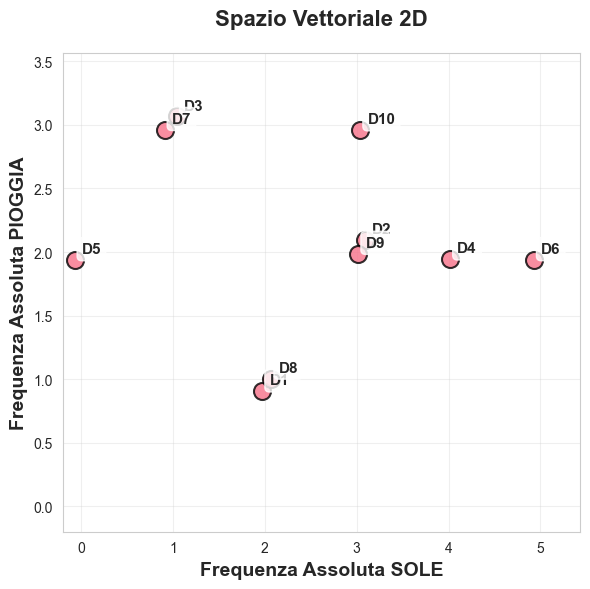

In [11]:
labels = ["D{}".format(i + 1) for i, _ in enumerate(corpus)]
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(
    data=Cj, 
    x='sole', 
    y='pioggia',
    s=150,
    alpha=0.8,
    edgecolor='black',
    linewidth=1.5
)
for idx, row in Cj.iterrows():
    ax.annotate(
        labels[idx],
        (row['sole'], row['pioggia']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8)
    )
plt.xlabel('Frequenza Assoluta SOLE', fontsize=14, fontweight='bold')
plt.ylabel('Frequenza Assoluta PIOGGIA', fontsize=14, fontweight='bold')
plt.title('Spazio Vettoriale 2D', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlim(-0.2, max(Cj['sole']) + 0.5)
plt.ylim(-0.2, max(Cj['pioggia']) + 0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Una prima utilità pratica: misurare distanze
I punti rappresentano i documenti nel senso delle loro proprietà lessicali. Ciò significa che se calcoliamo la distanza fra questi punti possiamo avere una misura della distanza lessicale fra due documenti.

Dal momento che abbiamo punti in uno spazio possiamo usare due metodi principali per calcolarne la distanza:

#### Distanza euclidea
$$d = \sqrt{ \sum\limits_{i=0}^{n}\left (x_i - y_i)^2 \right ) }$$

#### Distanza del coseno
$$ d = \frac{\mathbf{a} \cdot \mathbf{b}}{|\mathbf{a}| * |\mathbf{b}|} $$

in cui:
- $\mathbf{a} \cdot \mathbf{b}$ è il prodotto scalare fra due vettori
- $\sqrt{\sum_{i=1}^{n} a_i^2}$ + la magnitudine di un vettore

## Term Frequency

$$
TF_{t, d} = \frac{count(t, d)}{\sum\limits_{i} count(t_i, d)}
$$

### Nota sul prodotto scalare
Il segno del prodotto scalare $\mathbf{a} \cdot \mathbf{b}$ ha un importante significato geometrico:

- Positivo ($\mathbf{a} \cdot \mathbf{b} > 0$): I vettori formano un angolo acuto ($\theta < 90°$), indicando che puntano in direzioni simili
- Zero ($\mathbf{a} \cdot \mathbf{b} = 0$): I vettori sono ortogonali (perpendicolari), formando un angolo retto ($\theta = 90°$)
- Negativo ($\mathbf{a} \cdot \mathbf{b} < 0$): I vettori formano un angolo ottuso ($\theta > 90°$), indicando che puntano in direzioni opposte

Nel nostro contesto meteorologico, un prodotto scalare positivo tra due vettori documento suggerisce pattern climatici simili, mentre un prodotto scalare negativo indica pattern contrastanti (uno prevalentemente soleggiato, l'altro piovoso).

### Usare la distanza per cercare documenti

In [12]:
from mdh.utils import cosine_distance, euclidean_distance

In [13]:
query = np.array([0.0, 1.0])
results = {}
for i, d in enumerate(c):
    results[labels[i]] = euclidean_distance(query, d)
R = pd.Series(results)

In [14]:
R.sort_values(ascending=True)

D5     1.000000
D1     2.000000
D8     2.000000
D3     2.236068
D7     2.236068
D2     3.162278
D9     3.162278
D10    3.605551
D4     4.123106
D6     5.099020
dtype: float64

In [15]:
for k, v in R.sort_values(ascending=True).items():
    i = labels.index(k)
    print(f"{labels[i]:<4} {np.round(v, 3):<8} => {c[i]} => {corpus[i]}")

D5   1.0      => [0. 2.] => pioggia pioggia
D1   2.0      => [2. 1.] => sole pioggia sole
D8   2.0      => [2. 1.] => sole sole pioggia
D3   2.236    => [1. 3.] => pioggia pioggia pioggia sole
D7   2.236    => [1. 3.] => sole pioggia pioggia pioggia
D2   3.162    => [3. 2.] => sole sole sole pioggia pioggia
D9   3.162    => [3. 2.] => pioggia sole sole sole pioggia
D10  3.606    => [3. 3.] => sole sole sole pioggia pioggia pioggia
D4   4.123    => [4. 2.] => sole sole sole sole pioggia pioggia
D6   5.099    => [5. 2.] => sole sole sole sole sole pioggia pioggia


## Domanda: quali sono i limiti di questo metodo così come emergono dall'esempio?

In [16]:
TF = (C.T / C.sum(axis=1)).T
tf = TF.to_numpy()

In [17]:
query = np.array([0.0, 1.0])
results = {}
for i, d in enumerate(tf):
    results[labels[i]] = euclidean_distance(query, d)
R_tf = pd.Series(results)

In [18]:
for k, v in R_tf.sort_values(ascending=True).items():
    i = labels.index(k)
    print(f"{labels[i]:<4} {np.round(v, 3):<8} => {c[i]} => {corpus[i]}")

D5   0.0      => [0. 2.] => pioggia pioggia
D3   0.354    => [1. 3.] => pioggia pioggia pioggia sole
D7   0.354    => [1. 3.] => sole pioggia pioggia pioggia
D10  0.707    => [3. 3.] => sole sole sole pioggia pioggia pioggia
D2   0.849    => [3. 2.] => sole sole sole pioggia pioggia
D9   0.849    => [3. 2.] => pioggia sole sole sole pioggia
D1   0.943    => [2. 1.] => sole pioggia sole
D4   0.943    => [4. 2.] => sole sole sole sole pioggia pioggia
D8   0.943    => [2. 1.] => sole sole pioggia
D6   1.01     => [5. 2.] => sole sole sole sole sole pioggia pioggia


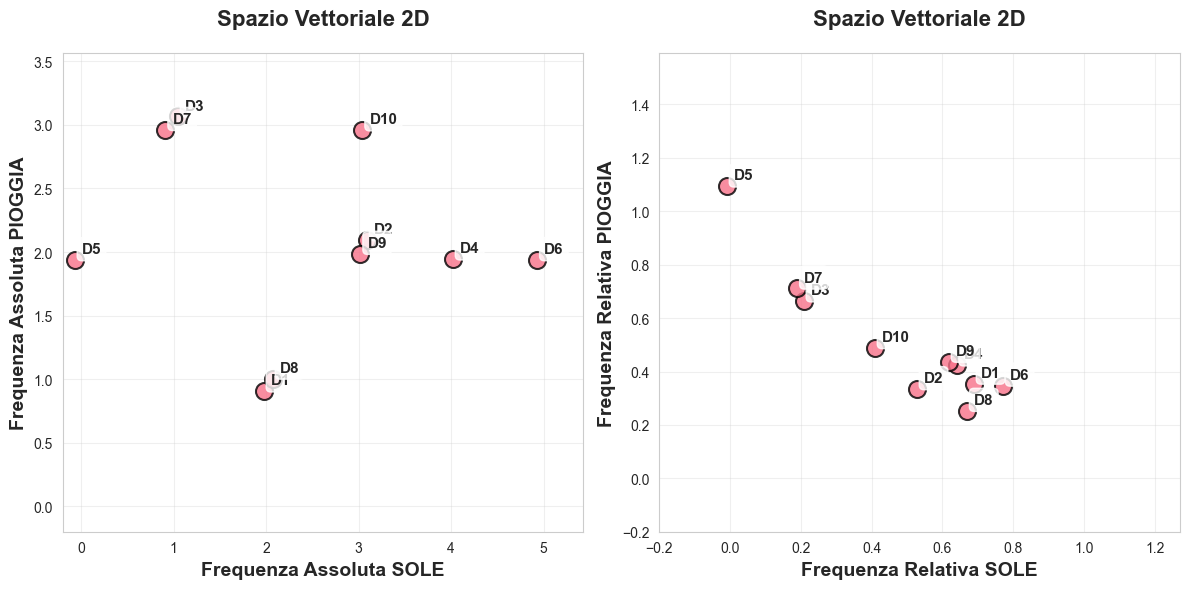

In [19]:
labels = ["D{}".format(i + 1) for i, _ in enumerate(corpus)]
TFj = TF.copy()
TFj['sole'] = TF['sole'] + np.random.uniform(-jitter_amount, jitter_amount, len(TF))
TFj['pioggia'] = TF['pioggia'] + np.random.uniform(-jitter_amount, jitter_amount, len(TF))


fig, ax = plt.subplots(figsize=(12, 6), ncols=2)

sns.scatterplot(
    data=Cj, 
    x='sole', 
    y='pioggia',
    s=150,
    alpha=0.8,
    edgecolor='black',
    linewidth=1.5,
    ax=ax[0]
)
for idx, row in Cj.iterrows():
    ax[0].annotate(
        labels[idx],
        (row['sole'], row['pioggia']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8)
    )
ax[0].set_xlabel('Frequenza Assoluta SOLE', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Frequenza Assoluta PIOGGIA', fontsize=14, fontweight='bold')
ax[0].set_title('Spazio Vettoriale 2D', 
          fontsize=16, fontweight='bold', pad=20)
ax[0].set_xlim(-0.2, max(Cj['sole']) + 0.5)
ax[0].set_ylim(-0.2, max(Cj['pioggia']) + 0.5)
ax[0].grid(True, alpha=0.3)

sns.scatterplot(
    data=TFj, 
    x='sole', 
    y='pioggia',
    s=150,
    alpha=0.8,
    edgecolor='black',
    linewidth=1.5,
    ax=ax[1]
)
for idx, row in TFj.iterrows():
    ax[1].annotate(
        labels[idx],
        (row['sole'], row['pioggia']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8)
    )
ax[1].set_xlabel('Frequenza Relativa SOLE', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Frequenza Relativa PIOGGIA', fontsize=14, fontweight='bold')
ax[1].set_title('Spazio Vettoriale 2D', 
          fontsize=16, fontweight='bold', pad=20)
ax[1].set_xlim(-0.2, max(TFj['sole']) + 0.5)
ax[1].set_ylim(-0.2, max(TFj['pioggia']) + 0.5)
ax[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# Ampliamo il vocabolario

In [20]:
import json

In [21]:
with open('./data/weather_dataset.json', 'r') as infile:
    W = json.load(infile)

In [24]:
D = W['documents']
docs = [x['text'] for x in D]

len(D) 

100

In [48]:
print(docs[0])
print(docs[1])

nuvole tiepido sole nebbia temporale pioggia temporale forte tiepido nuvole sole debole oggi ieri pioggia ieri sole sereno clima ieri
forte fresco caldo oggi forte neve tempo sole pioggia sole tempo nuvole ieri tempo debole


## Indicizzazione
1. tokenizzazione: separazione dei termini
2. pesatura dei termini

In [67]:
term_index = defaultdict(lambda: defaultdict(lambda: 0))

for i, doc in enumerate(docs):
    for token in doc.split():
        term_index[i][token] += 1
corpus = pd.DataFrame(term_index).fillna(0)

In [68]:
corpus 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
nuvole,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0
tiepido,2.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0
sole,3.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
nebbia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0
temporale,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
pioggia,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0
forte,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
debole,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0
oggi,1.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0
ieri,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,...,0.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0


In [42]:
vocabulary = list(corpus.index.values) 

In [41]:
vocabulary

array(['nuvole', 'tiepido', 'sole', 'nebbia', 'temporale', 'pioggia',
       'forte', 'debole', 'oggi', 'ieri', 'sereno', 'clima', 'fresco',
       'caldo', 'neve', 'tempo', 'giorno', 'intenso', 'coperto',
       'leggero', 'vento', 'freddo', 'grandine', 'umido'], dtype=object)

In [43]:
query = "ieri pioggia intenso oggi pioggia clima fresco"
q = np.zeros(len(vocabulary))
for token in query.split():
    try:
        i = vocabulary.index(token)
        q[i] += 1
    except Exception:
        pass

In [53]:
answer = {}
for col in corpus.columns:
    d = corpus[col]
    sim = cosine_distance(q, d)
    answer[col] = sim 
A = pd.Series(answer)

In [55]:
A.sort_values(ascending=True)

43    0.289331
25    0.314006
32    0.333333
50    0.351819
11    0.367918
        ...   
90    0.916667
47    0.919155
12    0.927261
9     0.928933
54    1.000000
Length: 100, dtype: float64

In [60]:
docs[12]

'tempo caldo giorno freddo giorno nuvole forte sole clima sole tiepido sereno giorno'

In [75]:
tf = corpus / corpus.sum(axis=0)

tf[0].sort_values(ascending=False)

ieri         0.15
sole         0.15
nuvole       0.10
tiepido      0.10
temporale    0.10
pioggia      0.10
clima        0.05
sereno       0.05
oggi         0.05
debole       0.05
forte        0.05
nebbia       0.05
coperto      0.00
grandine     0.00
freddo       0.00
vento        0.00
leggero      0.00
fresco       0.00
intenso      0.00
giorno       0.00
tempo        0.00
neve         0.00
caldo        0.00
umido        0.00
Name: 0, dtype: float64

## Document frequency

$$
DF_t = \frac{\mid \{d : t \in d\} \mid}{\mid D \mid}
$$

### Inverse document frequency (IDF)

$$
IDF_t = \log \left ( \frac{\mid D \mid}{\mid \{d : t \in d\} \mid} \right )
$$

In [82]:
df = pd.Series()
for token in vocabulary:
    x = 0
    for doc in corpus.loc[token]:
        if doc > 0:
            x += 1
    df[token] = x 
df = df

In [85]:
idf = np.log(len(docs) / df)

In [86]:
idf

nuvole       0.462035
tiepido      0.891598
sole         0.733969
nebbia       0.916291
temporale    0.967584
pioggia      0.579818
forte        1.237874
debole       1.078810
oggi         0.494296
ieri         0.494296
sereno       0.579818
clima        0.400478
fresco       0.891598
caldo        0.776529
neve         0.994252
tempo        0.371064
giorno       0.462035
intenso      0.941609
coperto      0.544727
leggero      1.469676
vento        0.994252
freddo       0.798508
grandine     1.237874
umido        0.713350
dtype: float64

In [89]:
(tf[0] * idf).sort_values(ascending=False)

sole         0.110095
temporale    0.096758
tiepido      0.089160
ieri         0.074144
forte        0.061894
pioggia      0.057982
debole       0.053940
nuvole       0.046204
nebbia       0.045815
sereno       0.028991
oggi         0.024715
clima        0.020024
coperto      0.000000
grandine     0.000000
freddo       0.000000
vento        0.000000
leggero      0.000000
fresco       0.000000
intenso      0.000000
giorno       0.000000
tempo        0.000000
neve         0.000000
caldo        0.000000
umido        0.000000
dtype: float64